In [4]:
# pomožne funkcije
def is_independent_set(G, S):
    for u in S:
        for v in S:
            if u != v and G.has_edge(u, v):
                return False
    return True
def neighbors_in_set(G, v, S):
    return sum(1 for u in S if G.has_edge(v, u))
def is_strong_odd_independent(G, S):
    if not is_independent_set(G, S):
        return False

    for v in G.vertices():
        if v not in S:
            if neighbors_in_set(G, v, S) % 2 == 0:
                return False
    return True
def alpha_od(G):
    V = G.vertices()
    best = 0

    for S in Subsets(V):
        S = list(S)
        if is_strong_odd_independent(G, S):
            best = max(best, len(S))

    return best


In [5]:
def check_conditions(G):
    r = G.degree(G.vertices()[0])  # PRAVILNA stopnja
    alpha = alpha_od(G)

    cond_i = True
    cond_ii = False

    for v in G.vertices():
        Nv = G.neighbors(v)
        if is_strong_odd_independent(G, Nv) and len(Nv) == alpha:
            cond_ii = True
        else:
            cond_i = False

    cond_iii = (alpha == r)

    return cond_i, cond_ii, cond_iii, alpha





In [6]:
SRGs_mali = [
    ("Petersen graph", graphs.PetersenGraph(), (10,3,0,1)), # Petersenov graf (gotovo ustreza)
    ("Clebsch graph", graphs.ClebschGraph(), (16,5,0,2)), # Clebschov graf je še en znan primer strogo regularnega grafa
]



for name, G, params in SRGs_mali:
    print("\n", name)
    print("Znani parametri (n,r,λ,μ):", params)
    print("Pogoji (i),(ii),(iii), α_od:")
    print(check_conditions(G))

def K_rr(r):
    return graphs.CompleteBipartiteGraph(r, r) # grafi K_r_r, ki tudi gotovo ustrezajo vsem pogojem

for r in [3,5,7]:
    G = K_rr(r)
    print(f"\nK_{{{r},{r}}}")
    print(check_conditions(G))



 Petersen graph
Znani parametri (n,r,λ,μ): (10, 3, 0, 1)
Pogoji (i),(ii),(iii), α_od:
(True, True, True, 3)

 Clebsch graph
Znani parametri (n,r,λ,μ): (16, 5, 0, 2)
Pogoji (i),(ii),(iii), α_od:


(False, False, False, 4)

K_{3,3}
(True, True, True, 3)

K_{5,5}
(True, True, True, 5)

K_{7,7}


(True, True, True, 7)


In [7]:
def random_regular_triangle_free_list(n, r, how_many=20, trials=2000):
    found = []

    for _ in range(trials):
        if len(found) >= how_many:
            break

        G = graphs.RandomRegular(r, n)

        if not G.is_connected():
            continue
        if G.clique_number() > 2:
            continue   # ni triangle-free

        found.append(G)

    return found


In [14]:
# sem bomo shranili po en primer
representatives = {}

wanted = {
    (True, True, True),
    (False, True, True),
    (False, False, True),
}

for n in range(6, 20, 2):      # n = 6,8,...,18
    for r in range(3, 8, 2):   # r = 3,5,7

        if r >= n:
            continue

        print("\n==============================")
        print(f"Testing n = {n}, r = {r}")

        graphs_found = random_regular_triangle_free_list(
            n=n,
            r=r,
            how_many=10,
            trials=3000
        )

        if len(graphs_found) == 0:
            print("No graphs found.")
            continue

        for G in graphs_found:
            i, ii, iii, alpha = check_conditions(G)
            key = (i, ii, iii)

            print("conditions (i),(ii),(iii), α_od:", (i, ii, iii, alpha))

            # shrani prvi primer vsake želene kombinacije
            if key in wanted and key not in representatives:
                representatives[key] = G



Testing n = 6, r = 3
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)
conditions (i),(ii),(iii), α_od: (True, True, True, 3)

Testing n = 6, r = 5


No graphs found.

Testing n = 8, r = 3
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 4)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 4)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 4)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 4)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)

Testing n = 8, r = 5


No graphs found.

Testing n = 8, r = 7


No graphs found.

Testing n = 10, r = 3
conditions (i),(ii),(iii), α_od: (False, True, True, 3)
conditions (i),(ii),(iii), α_od: (False, False, False, 5)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 5)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)

Testing n = 10, r = 5


No graphs found.

Testing n = 10, r = 7


No graphs found.

Testing n = 12, r = 3
conditions (i),(ii),(iii), α_od: (False, False, False, 4)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, True, 3)
conditions (i),(ii),(iii), α_od: (False, False, True, 3)


conditions (i),(ii),(iii), α_od: (False, False, False, 6)
conditions (i),(ii),(iii), α_od: (False, False, False, 4)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)
conditions (i),(ii),(iii), α_od: (False, False, False, 6)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)

Testing n = 12, r = 5


No graphs found.

Testing n = 12, r = 7


No graphs found.

Testing n = 14, r = 3


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 5)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 4)


conditions (i),(ii),(iii), α_od: (False, False, False, 5)


conditions (i),(ii),(iii), α_od: (False, False, False, 5)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)

Testing n = 14, r = 5


No graphs found.

Testing n = 14, r = 7


No graphs found.

Testing n = 16, r = 3


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 5)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 4)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 5)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 6)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)

Testing n = 16, r = 5


No graphs found.

Testing n = 16, r = 7


No graphs found.

Testing n = 18, r = 3


conditions (i),(ii),(iii), α_od: (False, False, False, 7)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 7)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)


conditions (i),(ii),(iii), α_od: (False, False, False, 0)

Testing n = 18, r = 5


No graphs found.

Testing n = 18, r = 7


No graphs found.



Reprezentativen primer za (i),(ii),(iii) = (False, False, True)


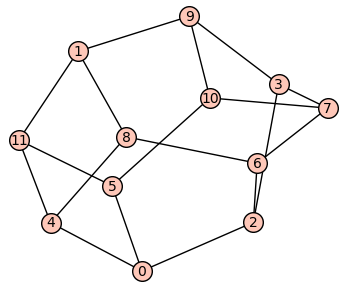


Reprezentativen primer za (i),(ii),(iii) = (True, True, True)


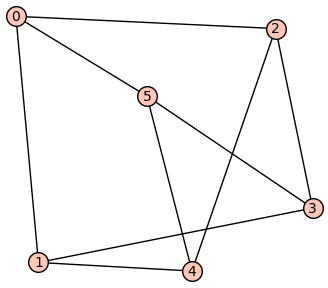


Reprezentativen primer za (i),(ii),(iii) = (False, True, True)


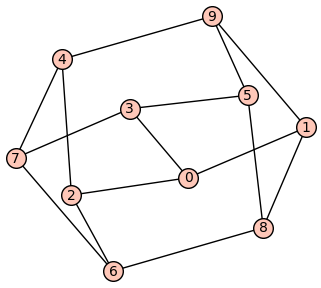

In [15]:
for key in wanted:
    print(f"\nReprezentativen primer za (i),(ii),(iii) = {key}")

    if key not in representatives:
        print("Primer ni bil najden.")
        continue

    G = representatives[key]
    G.show(layout="spring", iterations=200, figsize=4)

